# Demo

## The Generator: Generation of graph-based Game Economies

In [2]:
from geevo.evolution.generator import EvolutionaryGraphGeneration
from geevo import nodes as n
from geevo.graph import Graph
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

# define config as input to control graph generation
conf = {
    n.Source: 3,
    n.RandomGate: 2,
    n.Pool: 4,
    n.Converter: 1
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# generate
egg = EvolutionaryGraphGeneration(conf)
egg.run()

Stopped after 37 iterations in 22.687ms. Num edges 10, fitness: 0


True

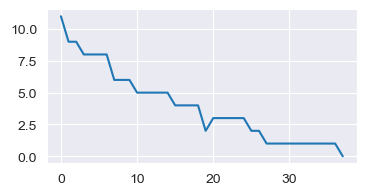

In [21]:
# plot fitness
plt.figure(figsize=(4, 2))
plt.plot(egg.fitness)

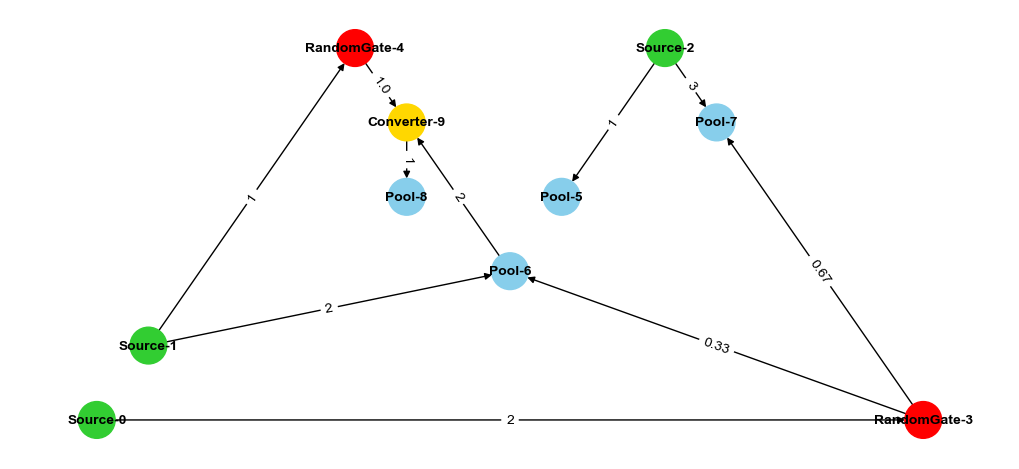

In [22]:
# create graph and plot it (using networkx library)
g = Graph(conf, egg.get_best())
g.plot()
# Note: weights on edges are randomly initialized --> these are to be fixed with the balancer

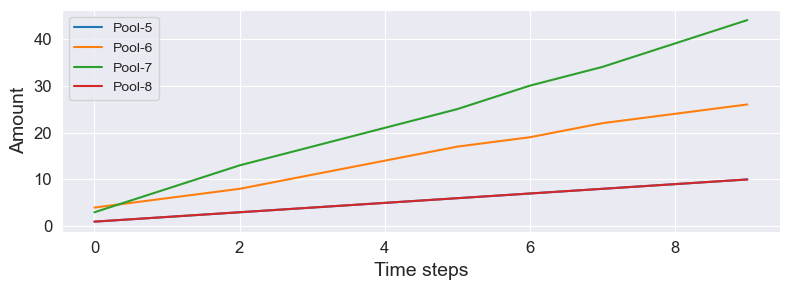

In [23]:
# simulate a graph economy
SIMULATION_STEPS = 40
g.simulate(10)
# plot simulation over time
g.simulator.plot_monitor(figsize=(8,3))

## The Balancer: Balancing of graph-based Game Economies


TODO: Documentation.